In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
con = sqlite3.connect("project_database")

In [2]:
cor=con.cursor()
cor.execute( '''CREATE TABLE customer (
customer_id varchar(10) NOT NULL,
name varchar(100) NOT NULL,
city varchar(65) NOT NULL,
email varchar(45) NOT NULL,
phone_no varchar(15) NOT NULL,
address varchar(100) NOT NULL,
pin_code int NOT NULL,
PRIMARY KEY (customer_id)
) ;''')

OperationalError: table customer already exists

In [3]:
cor.execute(''' INSERT INTO `customer` VALUES ('C1001','Steve','Tokyo','steve@gmail.com','4567897652','f.g.road',99),('C1002','john','Sydney','john@gmail.com','9987234567','k.c.road',75001),('C1003','Peter','Kanagawa','peter.parker@mail.com','9969834567','2F Ikenobecho',171),('C1004','Jackson','Tokyo','Jackson@gmail.com','7765834567','24-2, Sendagaya',8429),('C1005','Jack','Lake Buena Vista','Jack@gmail.com','8876345678','1520 E Buena Vista Drive',32830);''')

In [4]:
cor.execute('''select * from customer;''')
customer_data = pd.DataFrame(cor.fetchall(), columns=[desc[0] for desc in
cor.description])
print(customer_data.head())

  customer_id     name              city                  email    phone_no  \
0       C1001    Steve             Tokyo        steve@gmail.com  4567897652   
1       C1002     john            Sydney         john@gmail.com  9987234567   
2       C1003    Peter          Kanagawa  peter.parker@mail.com  9969834567   
3       C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567   
4       C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678   

                    address  pin_code  
0                  f.g.road        99  
1                  k.c.road     75001  
2             2F Ikenobecho       171  
3           24-2, Sendagaya      8429  
4  1520 E Buena Vista Drive     32830  


In [5]:
cor=con.cursor()
cor.execute(''' CREATE TABLE product (
product_id varchar(10) NOT NULL,
product_name varchar(100) NOT NULL,
category varchar(65) NOT NULL,
sub_category varchar(45) NOT NULL,
original_price double NOT NULL,
selling_price double NOT NULL,
stock int NOT NULL,
PRIMARY KEY (product_id)
);''')

In [6]:
cor=con.cursor()
cor.execute(''' CREATE TABLE order_details(
    order_id INTEGER PRIMARY KEY,
    customer_id TEXT NOT NULL,
    product_id TEXT NOT NULL,
    quantity REAL NOT NULL,
    total_price REAL NOT NULL,
    payment_mode TEXT NOT NULL,
    order_date DATETIME DEFAULT NULL,
    order_status TEXT NOT NULL,
    FOREIGN KEY (customer_id) REFERENCES customer(customer_id),
    FOREIGN KEY (product_id) REFERENCES product(product_id)
);''')

In [7]:
cor.execute('''INSERT INTO `product` VALUES('P104','Smartphone','Electronics','phone',45000,40000,20);''')

In [8]:
cor.execute('''INSERT INTO `product` VALUES ('P102','Chair','furniture','Chairs',20000,15000,10);''')

In [9]:
cor.execute('''INSERT INTO `product` VALUES ('P101','chair','furniture','phone',450,400,21);''')

In [10]:
cor.execute('''INSERT INTO `product` VALUES('P106','Smartphone','Electronics','phone',4500000,400000,26);''')

In [11]:
cor.execute('''INSERT INTO `product` VALUES ('P100','Smartphone','Electronics','chairs',550,500,22);''')

In [12]:
cor.execute('''INSERT INTO `product` VALUES ('P108','table','furniture','table',4500,4000,24);''')

In [13]:
cor.execute('''select * from product;''')
product_data = pd.DataFrame(cor.fetchall(), columns=[desc[0] for desc in
cor.description])
print(product_data.head())

  product_id product_name     category sub_category  original_price  \
0       P104   Smartphone  Electronics        phone         45000.0   
1       P102        Chair    furniture       Chairs         20000.0   
2       P101        chair    furniture        phone           450.0   
3       P106   Smartphone  Electronics        phone       4500000.0   
4       P100   Smartphone  Electronics       chairs           550.0   

   selling_price  stock  
0        40000.0     20  
1        15000.0     10  
2          400.0     21  
3       400000.0     26  
4          500.0     22  


In [14]:
cor.execute('''INSERT INTO `order_details` VALUES(9,'C108','P109',1.0,3000.0,'COD',2022-04-02,'delivery');''')

In [15]:
cor.execute('''INSERT INTO `order_details` VALUES(6,'C108','P100',1.0,3000.0,'COD',2023-10-02,'PENDING');''')

In [16]:
cor.execute('''INSERT INTO `order_details` VALUES(2,'C102','P111',1.0,2000.0,'COD',2023-01-02,'PENDING');''')

In [17]:
cor.execute('''INSERT INTO `order_details` VALUES(10,'C108','P124',1.0,10000.0,'COD',2022-10-02,'delivery');''')

In [18]:
cor.execute('''INSERT INTO `order_details` VALUES(12,'C112','P24',1.0,20000.0,'COD',2022-04-04,'delivery');''')

In [19]:
cor.execute('''INSERT INTO `order_details` VALUES(14,'C110','P024',1.0,90000.0,'COD',2022-08-10,'delivery');''')

In [20]:
cor.execute('''INSERT INTO `order_details` VALUES(16,'C116','P120',1.0,40000.0,'COD',2022-12-20,'delivery');''')

In [21]:
cor.execute('''INSERT INTO `order_details` VALUES(25,'C1025','P1',401.0,14000.0,'COD',2023-12-02,'pending');''')

In [22]:
cor.execute('''select * from order_details;''')
order_details = pd.DataFrame(cor.fetchall(), columns=[desc[0] for desc in
cor.description])
print(order_details.head(20))

   order_id customer_id product_id  quantity  total_price payment_mode  \
0         2        C102       P111       1.0       2000.0          COD   
1         6        C108       P100       1.0       3000.0          COD   
2         9        C108       P109       1.0       3000.0          COD   
3        10        C108       P124       1.0      10000.0          COD   
4        12        C112        P24       1.0      20000.0          COD   
5        14        C110       P024       1.0      90000.0          COD   
6        16        C116       P120       1.0      40000.0          COD   
7        25       C1025         P1     401.0      14000.0          COD   

   order_date order_status  
0        2020      PENDING  
1        2011      PENDING  
2        2016     delivery  
3        2010     delivery  
4        2014     delivery  
5        2004     delivery  
6        1990     delivery  
7        2009      pending  


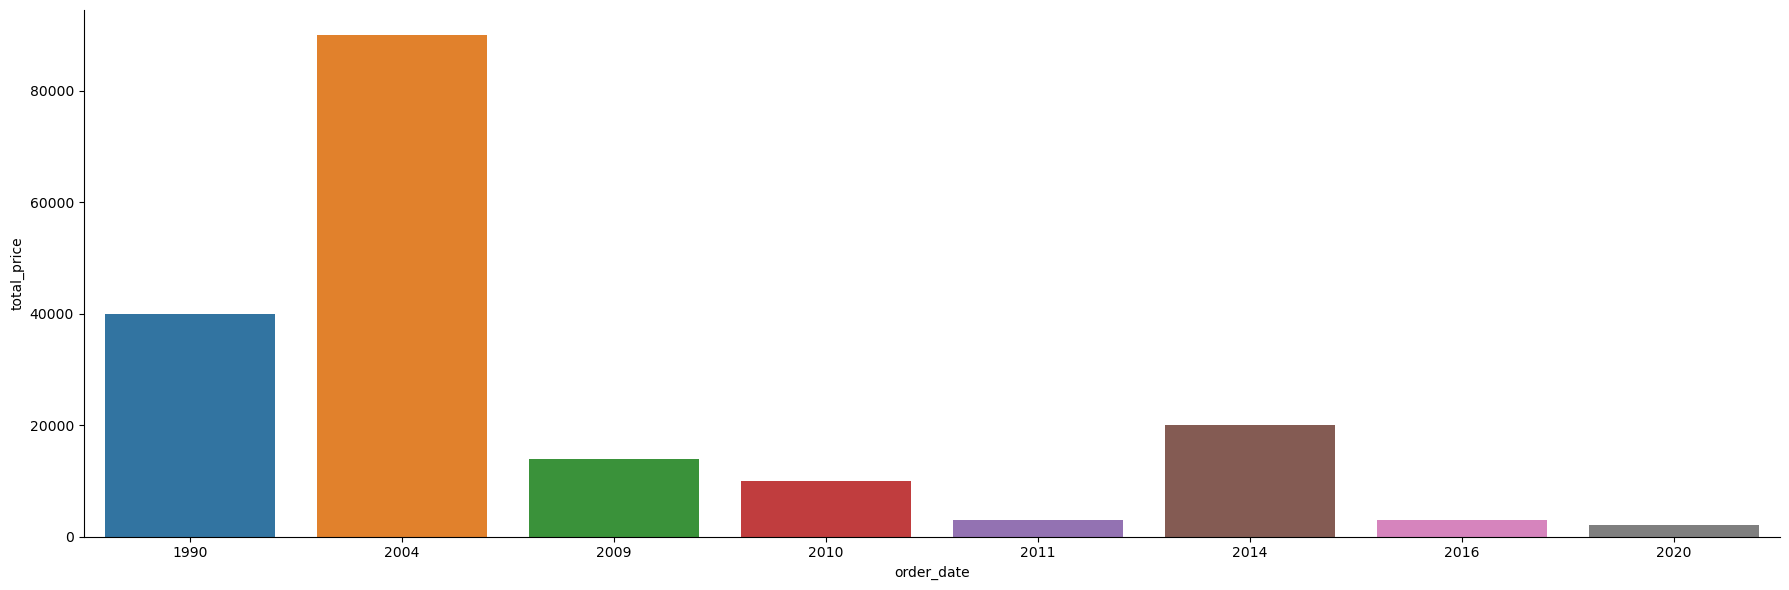

In [50]:
sns.catplot(y='total_price',x='order_date',data=order_details.sort_values('total_price',ascending=False),kind='bar',height=6,aspect=3)
plt.show()

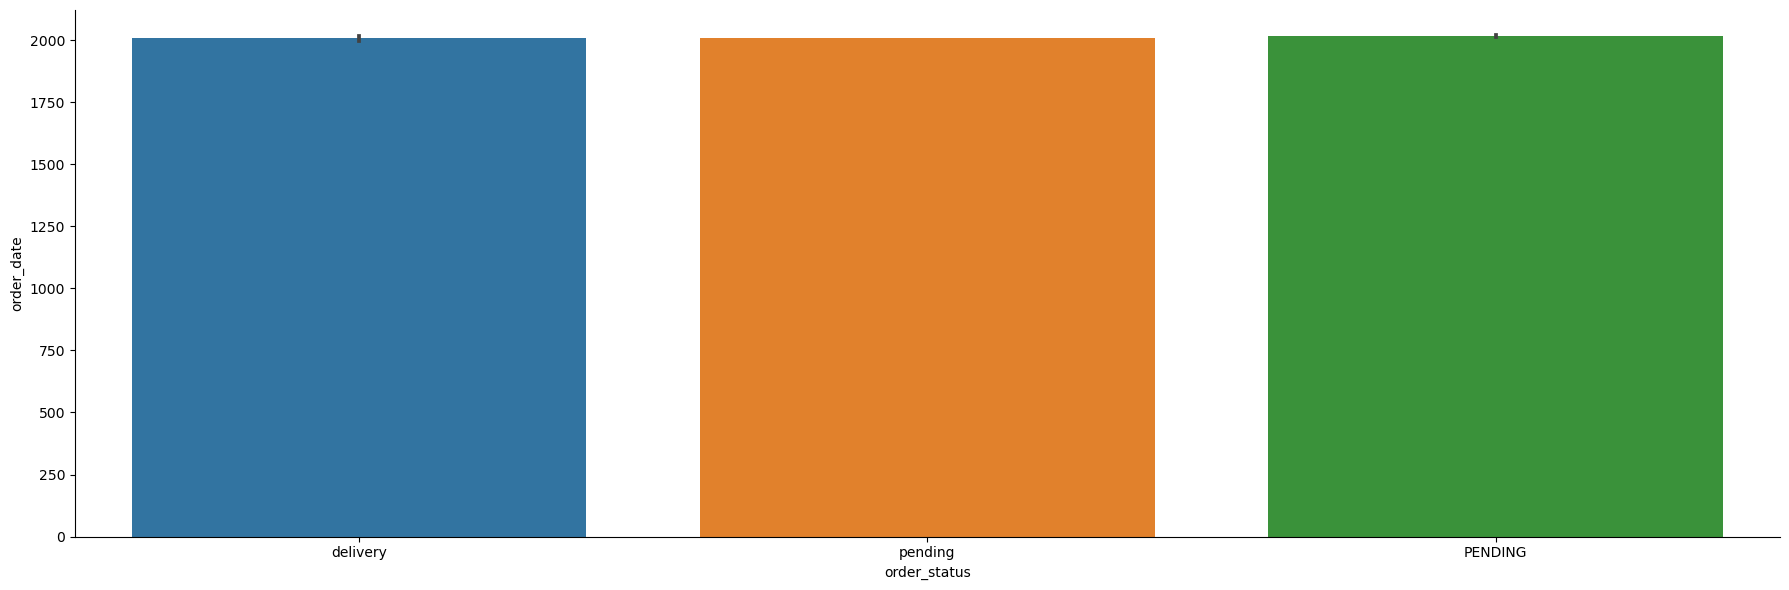

In [61]:
sns.catplot(y='order_date',x='order_status',data=order_details.sort_values('total_price',ascending=False),kind='bar',height=6,aspect=3)
plt.show()

In [23]:
print(customer_data.nunique())
print(product_data.nunique())
print(order_details.nunique())

customer_id    5
name           5
city           4
email          5
phone_no       5
address        5
pin_code       5
dtype: int64
product_id        6
product_name      4
category          2
sub_category      4
original_price    6
selling_price     6
stock             6
dtype: int64
order_id        8
customer_id     6
product_id      8
quantity        2
total_price     7
payment_mode    1
order_date      8
order_status    3
dtype: int64


In [24]:
print(customer_data.isnull().sum())
print(product_data.isnull().sum())
print(order_details.isnull().sum())

customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64
product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64
order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64


<AxesSubplot:title={'center':'total number of customers City wise'}, xlabel='city'>

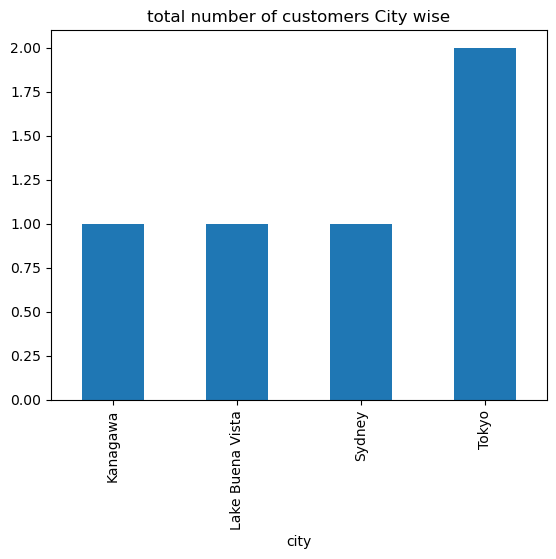

In [25]:
# Identify the total number of customers City wise
customer_data.groupby('city')['customer_id'].count().plot(kind='bar',title='total number of customers City wise')

<AxesSubplot:title={'center':'total number of customers City wise'}, xlabel='category'>

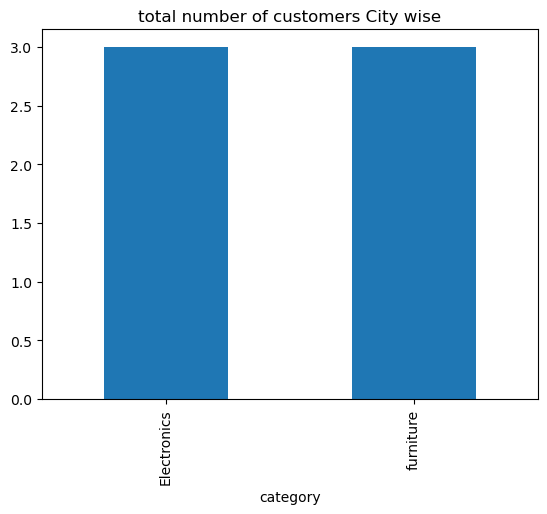

In [26]:
#Determine the total number of products available by category
product_data.groupby('category')['product_name'].count().plot(kind='bar',title='total number of customers City wise')

<AxesSubplot:title={'center':'total number of customers City wise'}, xlabel='sub_category'>

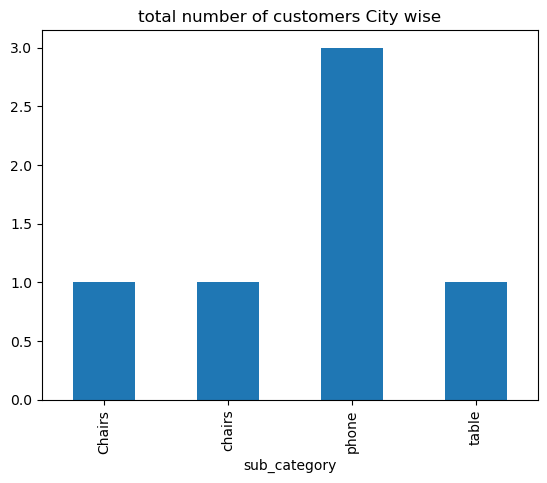

In [27]:
#Analyze the distribution of products across sub-categories.
product_data.groupby('sub_category')['product_name'].count().plot(kind='bar',title='total number of customers City wise')

1    10
Name: stock, dtype: int64
Products with low stock levels:
  product_id product_name   category sub_category  original_price  \
1       P102        Chair  furniture       Chairs         20000.0   

   selling_price  stock  
1        15000.0     10  


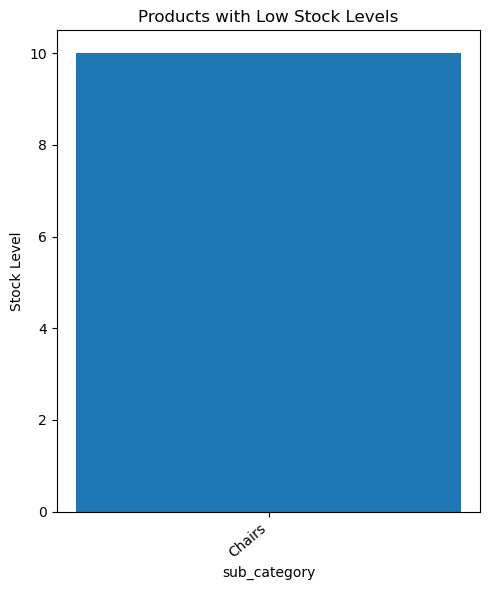

In [29]:
#Identify products with low stock levels
import matplotlib.pyplot as plt 
low_stock_threshold = 20
print(product_data['stock'] )
# Filter the DataFrame to identify products with low stock levels
product_data = product_data[product_data['stock'] < low_stock_threshold]

print("Products with low stock levels:")
print(product_data)

# Plotting the bar graph
plt.figure(figsize=(5, 6))
plt.bar(product_data['sub_category'], product_data['stock'])
plt.xlabel('sub_category')
plt.ylabel('Stock Level')
plt.title('Products with Low Stock Levels')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'order status distribution'}, xlabel='order_status'>

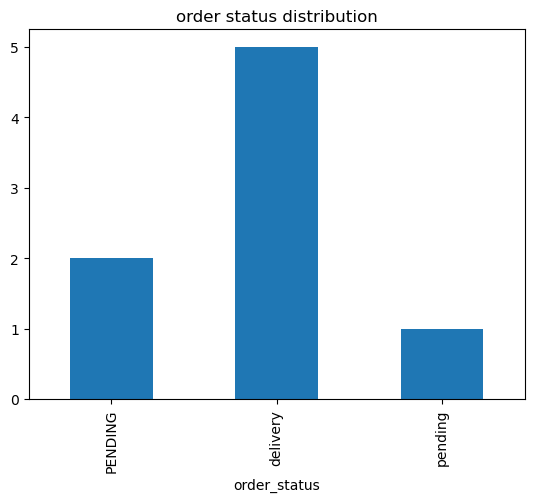

In [30]:
order_details.groupby('order_status')['order_id'].count().plot(kind='bar',title='order status distribution')